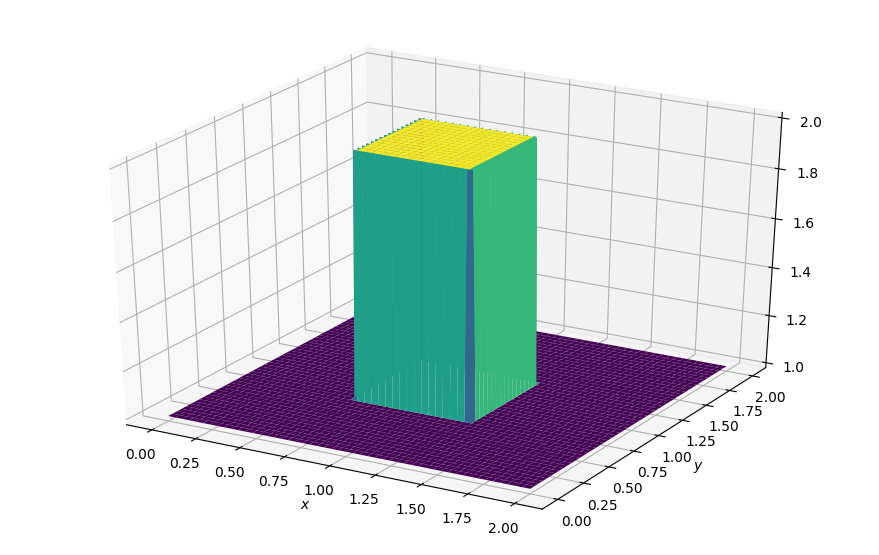

In [16]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#variable declarations
nx = 101
ny = 101
nt = 20
c = 1
dx = 1.5 / (nx - 1)
dy = 1.5 / (ny - 1)
sigma = 0.2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))

#initial conditions
#u(0.5 < x < 1 and 0.5 < y < 1) = 2
u[int(0.5 / dy):int(1 / dy),int(0.5 / dx):int(1 / dx)] = 2
#v(0.5 < x < 1 and 0.5 < y < 1) = 2
v[int(0.5 / dy):int(1 / dy),int(0.5 / dx):int(1 / dx)] = 2

#plot initial conditions
fig = pyplot.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [17]:
#convection function
for n in range(nt + 1):
    
    un = u.copy()
    vn = u.copy()
    
    u[1:, 1:] = (un[1:, 1:] - u[1:, 1:] * dt / dx * (un[1:, 1:] - un[1:, :-1]) -
                            v[1:, 1:] * dt / dx * (un[1:, 1:] - un[:-1, 1:]))
    
    v[1:, 1:] = (vn[1:, 1:] - u[1:, 1:] * dt / dx * (vn[1:, 1:] - vn[1:, :-1]) -
                            v[1:, 1:] * dt / dx * (vn[1:, 1:] - vn[:-1, 1:]))
        
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

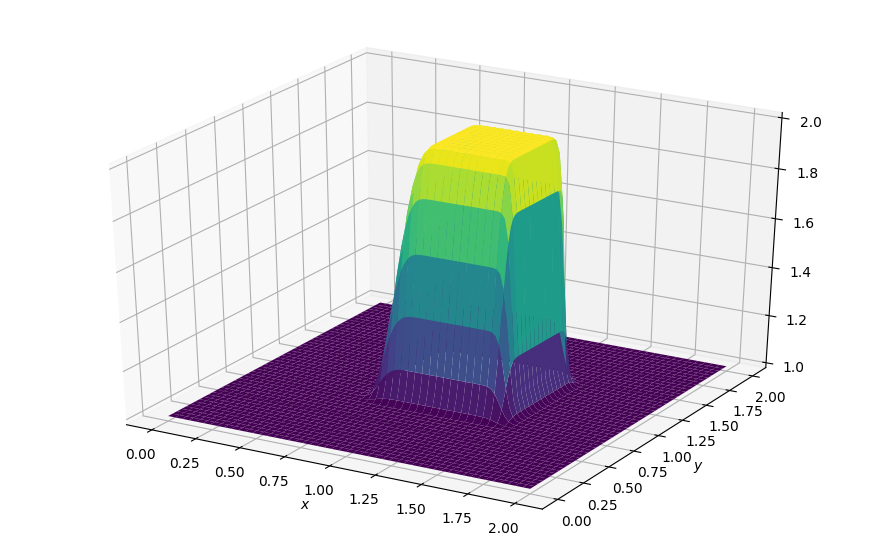

In [18]:
#plot u result
fig = pyplot.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

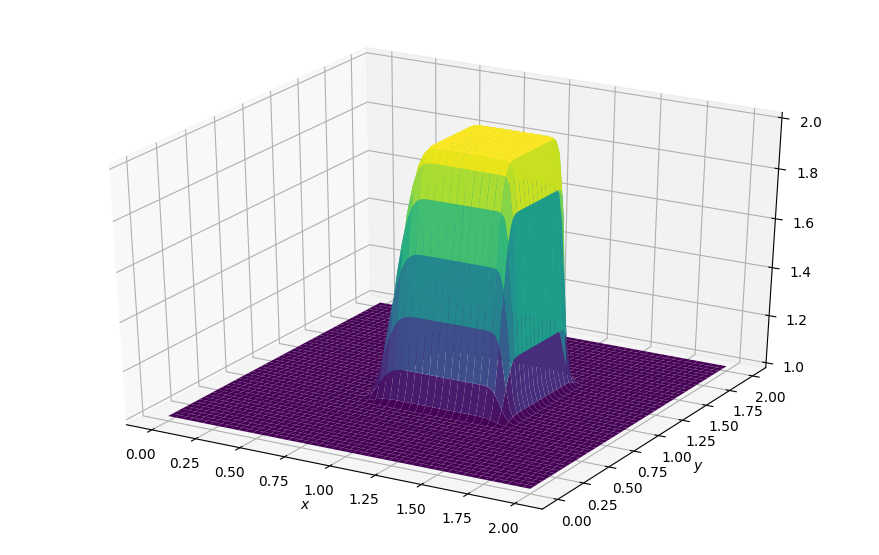

In [19]:
#plot v result
fig = pyplot.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');